# Area Charts

Tutorial from https://python-graph-gallery.com/570-custom-streamchart/ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Gather the data:
* It contains data about x-men and the number of times they appeared in the comics between the 60's and the 90's.

In [15]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mutant_moneyball.csv'
df = pd.read_csv(url)

In [16]:
df.to_csv("xmen_data_raw.csv", index=False)

In [17]:
df.head()

,Member,TotalIssues,TotalIssues60s,TotalIssues70s,TotalIssues80s,TotalIssues90s,totalIssueCheck,TotalValue_heritage,TotalValue60s_heritage,TotalValue70s_heritage,...,TotalValue80s_oStreet,TotalValue90s_oStreet,PPI60s_wiz,PPI70s_wiz,PPI80s_wiz,PPI90s_wiz,PPI60s_oStreet,PPI70s_oStreet,PPI80s_oStreet,PPI90s_oStreet
0,warrenWorthington,139,61,35,20,23,139,1108558,929056,154585,...,$975.00,$123.00,$129.72,$31.57,$11.30,$2.86,"$1,117.38",$210.29,$48.75,$5.35
1,hankMcCoy,119,62,38,9,10,119,957993,929776,20705,...,$431.00,$81.00,$128.27,$22.39,$9.89,$3.85,"$1,103.06",$138.42,$47.89,$8.10
2,scottSummers,197,63,69,56,9,197,1152230,933616,188635,...,"$1,427.00",$74.00,$126.87,$28.68,$7.82,$4.36,"$1,088.73",$169.20,$25.48,$8.22
3,bobbyDrake,123,62,35,6,20,123,1086749,929776,154585,...,$137.00,$108.00,$128.27,$31.57,$8.00,$3.10,"$1,103.06",$210.29,$22.83,$5.40
4,jeanGrey,164,63,58,14,29,164,1132091,933616,179899,...,$822.00,$189.00,$126.87,$28.95,$11.79,$3.72,"$1,088.73",$176.98,$58.71,$6.52


### Data Cleaning

Since the name of the x-men is written in camelCase, we will need to split it into two words. For example, scottSummers will become Scott Summers.

In [18]:
def format_name(s):
    if " " in s:
        return s
    formatted_string = ""
    for i, char in enumerate(s):
        if char.isupper() and i != 0:
            formatted_string += " " + char
        else:
            formatted_string += char
    if formatted_string:
        formatted_string = formatted_string[0].upper() + formatted_string[1:]

    return formatted_string


df['Member'] = df['Member'].apply(format_name)

df = df[['Member', 'TotalIssues60s', 'TotalIssues70s',
         'TotalIssues80s', 'TotalIssues90s']]
df.set_index('Member', inplace=True)

df.head()

,TotalIssues60s,TotalIssues70s,TotalIssues80s,TotalIssues90s
Member,,,,
Warren Worthington,61,35,20,23
Hank Mc Coy,62,38,9,10
Scott Summers,63,69,56,9
Bobby Drake,62,35,6,20
Jean Grey,63,58,14,29


The data is currently in a wide format, which means that one row represent one x-men and the columns represent the value for eachd decade. We will need to transpose it to a long format, where each row represents a decade and the columns represent the x-men.

In [19]:
# transpose the dataframe
df_transposed = df.T

decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

df_transposed.head()

Member,Warren Worthington,Hank Mc Coy,Scott Summers,Bobby Drake,Jean Grey,Alex Summers,Lorna Dane,Ororo Munroe,Kurt Wagner,Logan Howlett,...,Rachel Summers,Eric Magnus,Alison Blaire,Longshot,Jonathan Silvercloud,Remy Le Beau,Jubilation Lee,Lucas Bishop,Betsy Braddock,Charles Xavier
TotalIssues60s,61,62,63,62,63,8,9,0,0,0,...,0,13,0,0,0,0,0,0,0,39
TotalIssues70s,35,38,69,35,58,13,13,36,36,36,...,0,7,0,0,0,0,0,0,0,46
TotalIssues80s,20,9,56,6,14,43,19,121,84,115,...,23,18,43,35,11,0,6,0,45,61
TotalIssues90s,23,10,9,20,29,4,7,33,0,16,...,1,3,2,0,28,17,17,16,14,23


In [20]:
df_transposed.to_csv("xmen_data.csv")

### Area Chart

Thanks to the stackplot() function from matplotlib, it is possible to create a simple streamgraph.

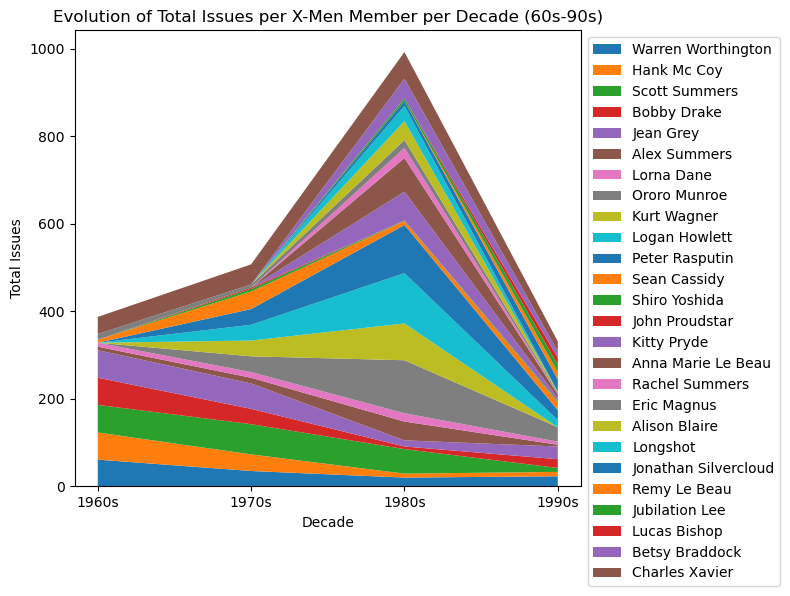

In [10]:
decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(decades, issues_list, labels=members)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

The color we will now use is based on the value of the total number of appearances, which means that we have to compute it first.

Then, we create a list of colors using the cm module from matplotlib.

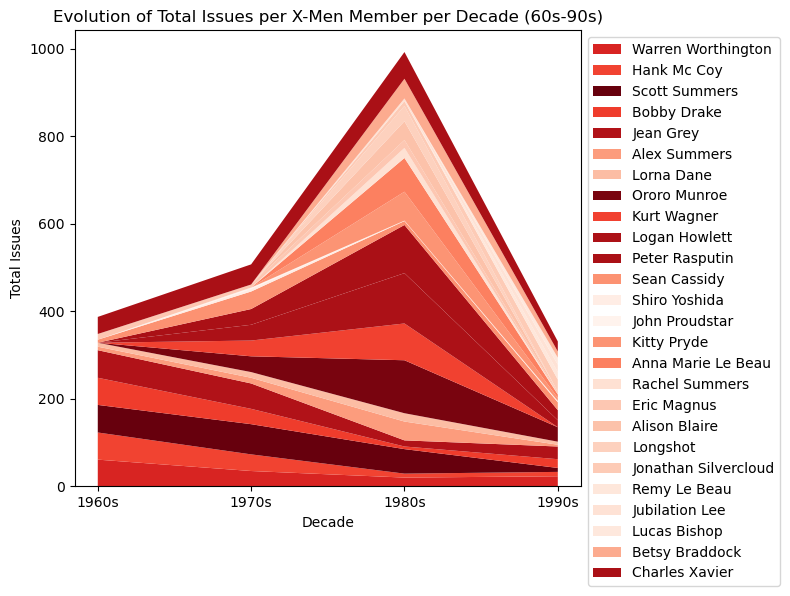

In [11]:
decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

# calculate the normalized totals to generate the colors
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(decades, issues_list, labels=members, colors=colors)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

If we want to change the order in which x-men are displayed, we can use the argsort() function from numpy.

It will gives us the index of the x-men, sorted by the total number of appearances. Then, we can use this index to reorder the list of values, name and colors.

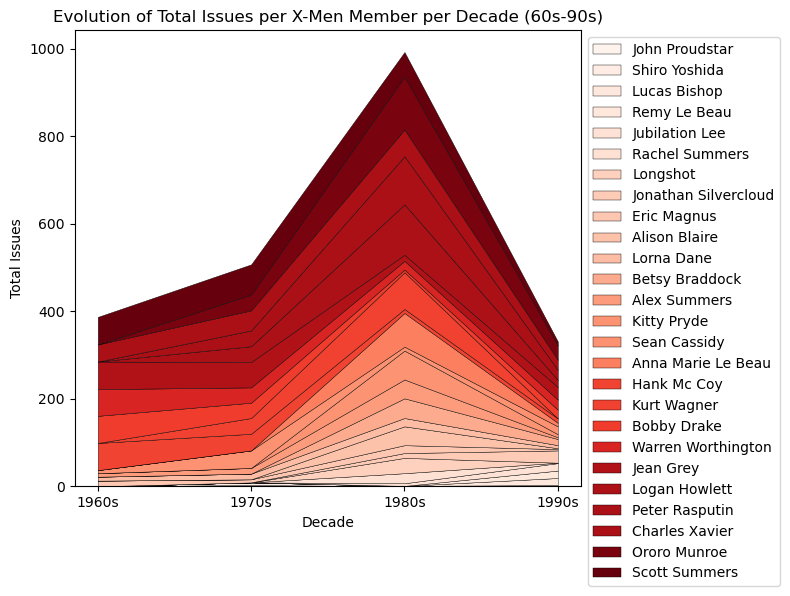

In [12]:
# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]

# plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(
    decades,
    sorted_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.3
)

# setting the title and labels
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting
fig.tight_layout()
plt.show()

If you want to smooth the stream, we need to use the interp1d function from scipy.

This function is a bit particular since it is used to create a function that can be used to interpolate the data. We give it a list of x and y values, and it returns a function that can be used to get the y value for any x value.

Then, we can use this function to create a new list of y values that will be used to create the streamgraph.


In [13]:
from scipy.interpolate import interp1d

# instead of 4 date points, we will use 40
decadesforsmooth = [1960, 1970, 1980, 1990]
new_decades = np.linspace(min(decadesforsmooth), max(
    decadesforsmooth), len(decadesforsmooth) * 10)

# interpolating each member's issues list for the new_decades
smoothed_issues_list = []
for issues in sorted_issues_list:
    interp_func = interp1d(
        decadesforsmooth,
        issues,
        kind='quadratic'
    )
    smoothed_issues = interp_func(new_decades)
    smoothed_issues_list.append(smoothed_issues)

Then, the rest of the code mainly stays the same. We just add a baseline='wiggle' argument to the stackplot() function to make the streamgraph look better.

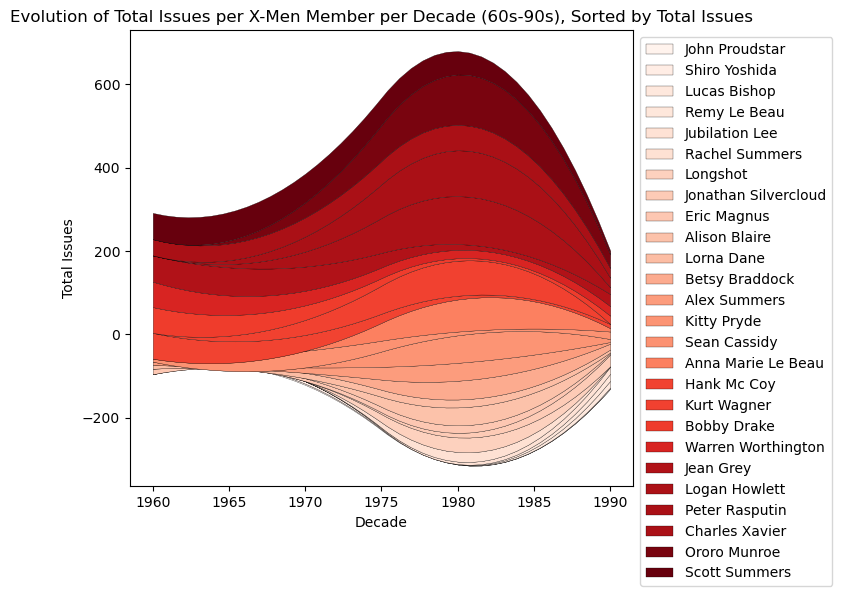

In [14]:
# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_issues_list = [sublist[:-1] for sublist in sorted_issues_list]

# create the chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(
    new_decades,
    smoothed_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.2,
    baseline='wiggle'
)

# setting the title and labels
ax.set_title(
    'Evolution of Total Issues per X-Men Member per Decade (60s-90s), Sorted by Total Issues')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting
fig.tight_layout()
plt.show()
